In [80]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 2.4 MB/s eta 0:00:42
   ---------------------------------------- 0.3/99.8 MB 4.2 MB/s eta 0:00:24
   ---------------------------------------- 0.6/99.8 MB 5.1 MB/s eta 0:00:20
   ---------------------------------------- 0.7/99.8 MB 4.7 MB/s eta 0:00:21
   ---------------------------------------- 0.7/99.8 MB 4.7 MB/s eta 0:00:21
    --------------------------------------- 1.2/99.8 MB 5.3 MB/s eta 0:00:19
    --------------------------------------- 1.6/99.8 MB 5.5 MB/s eta 0:00:18
    --------------------------------------- 1.9/99.8 MB 5.2 MB/s eta 0:00:19
    --------------------------------------- 2.2/99.8 MB 5.3 MB/s eta 0:00:19
    --------------------------------------- 2.4/99.8 MB 5.3 MB/s eta 0:00:19
   - -------------------------------------- 2.6/99.8 MB 5.2 MB/s eta 0:00:19
   - -------------------------------------- 2.7/99.8 MB 4.9 MB/s eta 0:00:20
   - -

In [82]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.3 MB 3.6 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.3 MB 5.0 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.3 MB 5.0 MB/s eta 0:00:01
   ------------------------- -------------- 0.8/1.3 MB 4.8 MB/s eta 0:00:01
   -------------------------------- ------- 1.1/1.3 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 5.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import joblib


In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


By looking  above data i can say that the column quality is the target variable making the remaining columns as the features that we can customize and use to predict our label. This problem falls under the category of a classification task.

In [5]:
df.shape

(1599, 12)

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All columns exclusively contain numerical values, with the label being the sole integer, resulting in uniform float data types for all feature columns.


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


By employing the describe method, I can retrieve key statistical metrics such as count, mean, standard deviation, minimum, maximum, and interquartile values for our dataset.

Upon analysis, noticeable disparities emerge, particularly:

    A substantial disparity between the 75th percentile and the maximum values in the residual sugar column.
    A significant gap between the 75th percentile and maximum values in the free sulfur dioxide column.
    A pronounced divergence between the 75th percentile and the maximum value in the total sulfur dioxide column.

These discrepancies strongly suggest the presence of outliers in our dataset, emphasizing the need for appropriate treatment to enhance model accuracy in subsequent steps.

In [9]:
df.skew() 

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Examining the skewness information within our dataset, we will exclude the 'quality' column as it serves as our target label. Upon inspecting the feature columns, it becomes evident that 'fixed acidity,' 'volatile acidity,' 'residual sugar,' 'chlorides,' 'free sulfur dioxide,' 'total sulfur dioxide,' 'density,' 'sulphates,' and 'alcohol' all exhibit skewness outside the acceptable range of +/-0.5. This skewness serves as an indication of potential outliers in our dataset, suggesting the need for treatment if deemed necessary.

## Visualization

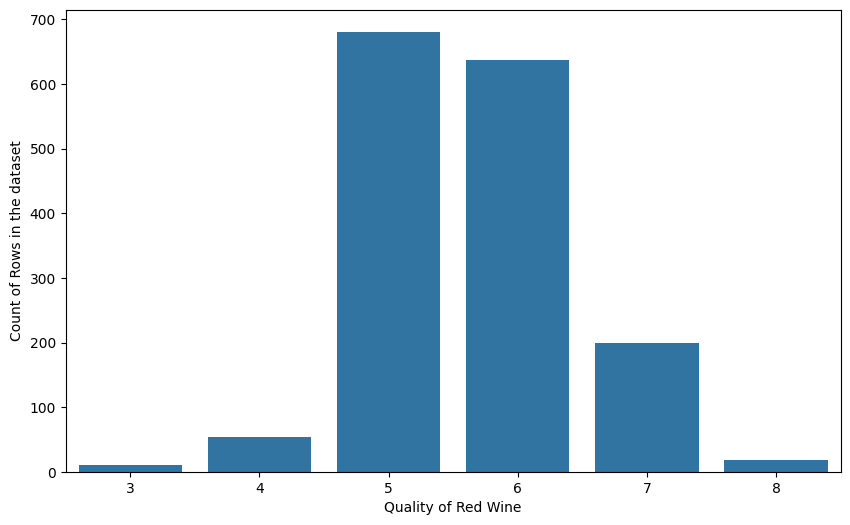

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

The countplot visualization illustrates the distribution of different categories for red wine quality, revealing a notable disparity. Specifically, the data count for quality scores 5 and 6 is significantly higher than their counterparts. This imbalance highlights the need for corrective measures to ensure that our machine learning model does not exhibit bias toward a specific quality score during predictions.


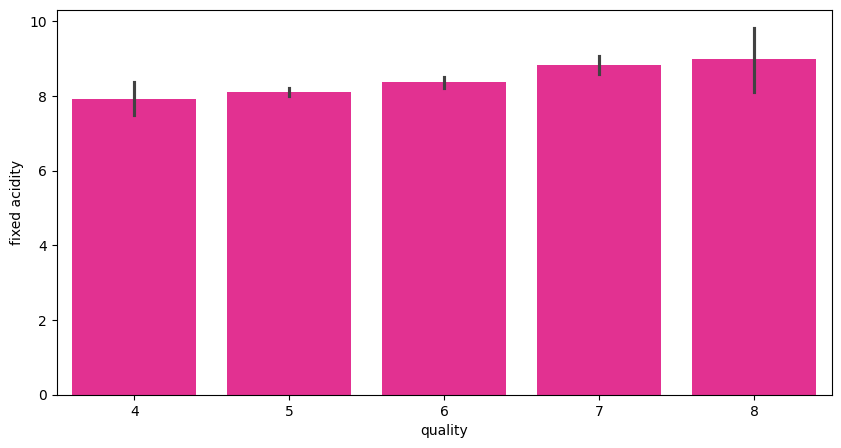

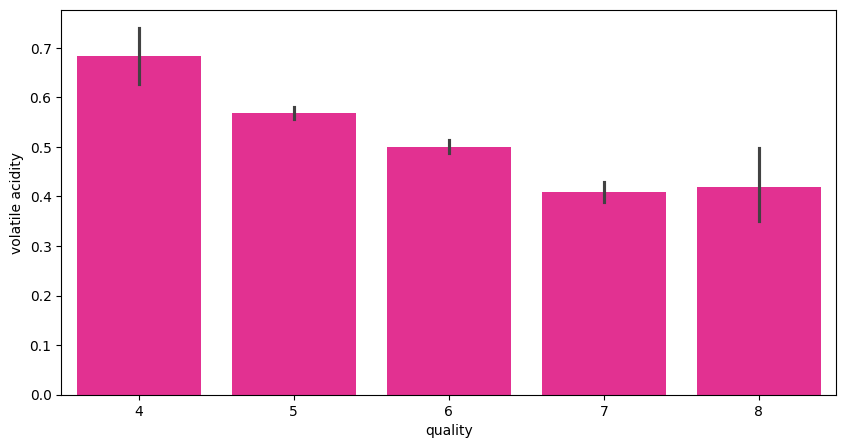

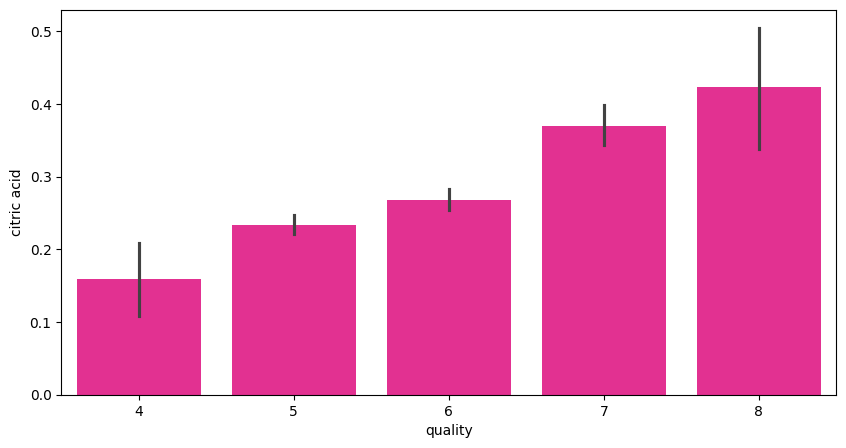

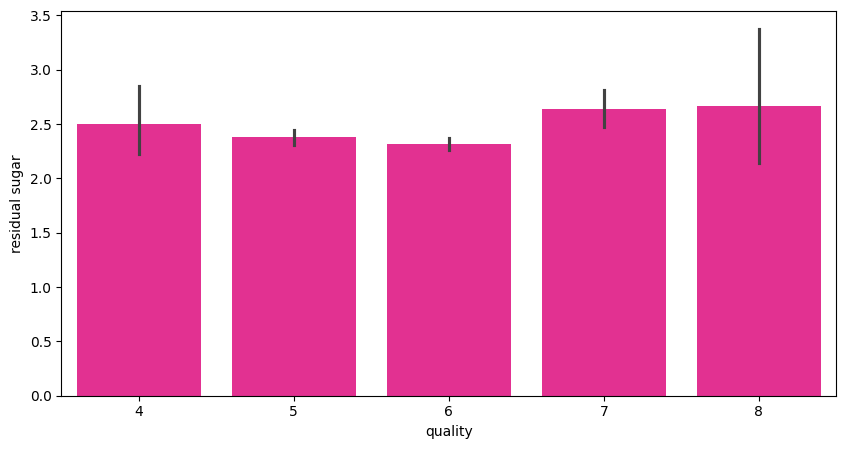

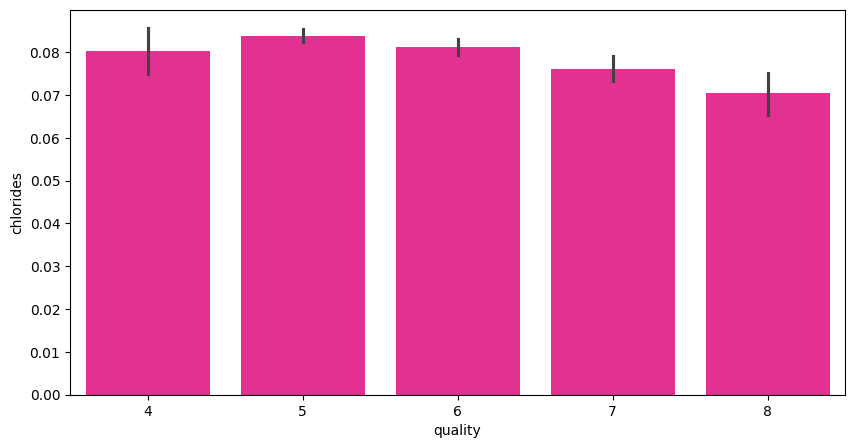

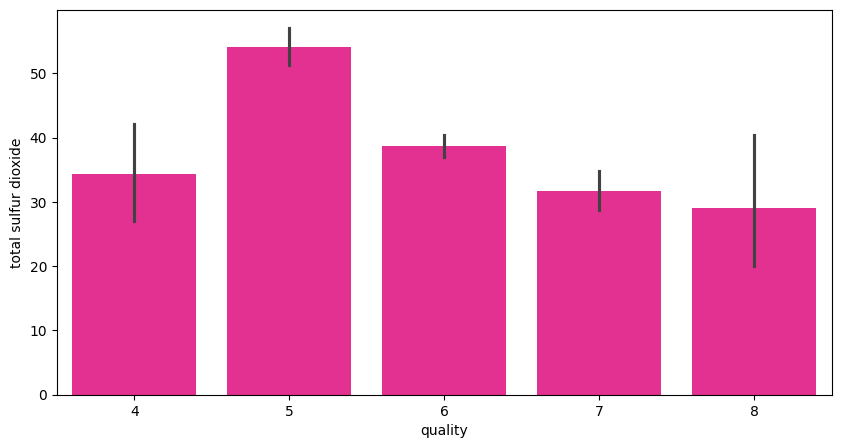

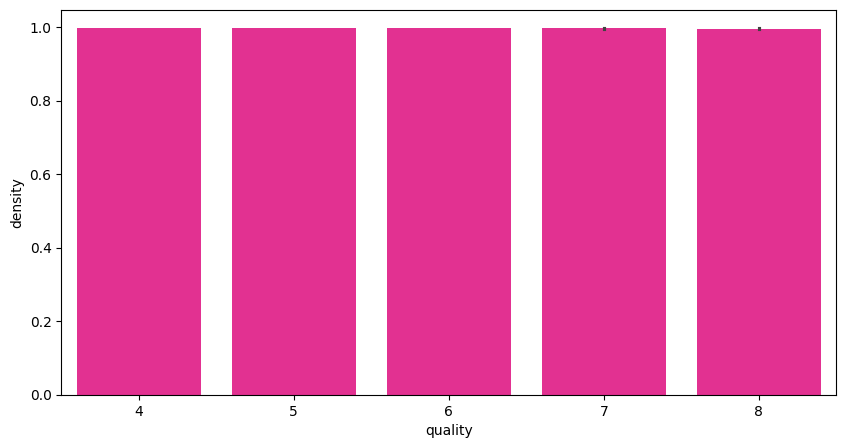

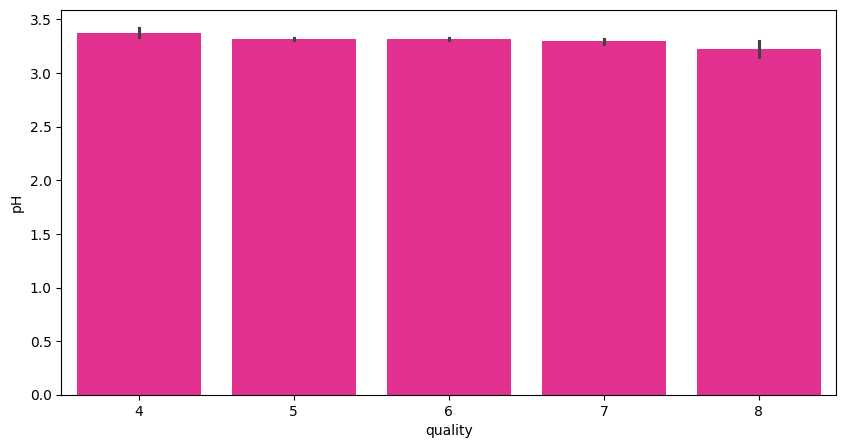

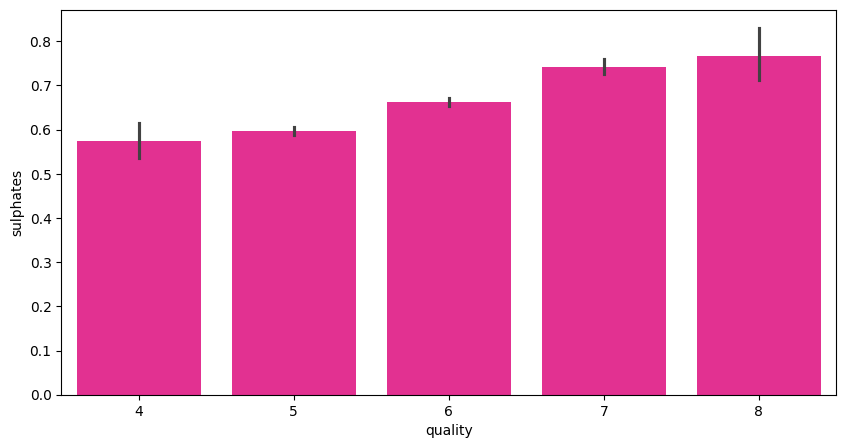

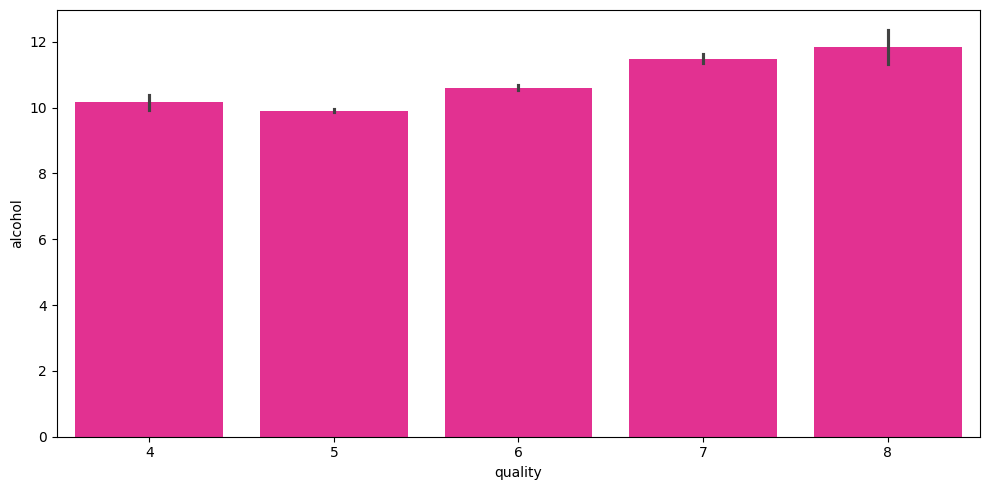

In [55]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="deeppink")
plt.tight_layout()


The feature vs. label barplot effectively illustrates the relationship between each feature and the target variable (quality). Key observations are as follows:

    Fixed acidity vs. quality: No discernible pattern.
    Volatile acidity vs. quality: Exhibits a decreasing trend.
    Citric acid vs. quality: Shows an increasing trend.
    Residual sugar vs. quality: No distinct pattern.
    Chlorides vs. quality: Demonstrates a decreasing trend.
    Free sulfur dioxide vs. quality: No consistent pattern, as it fluctuates between increasing and decreasing.
    Total sulfur dioxide vs. quality: No consistent pattern, as it fluctuates between increasing and decreasing.
    Density vs. quality: No discernible pattern.
    pH vs. quality: No discernible pattern.
    Sulphates vs. quality: Exhibits an increasing trend.
    Alcohol vs. quality: Displays an increasing trend.

In summary, it can be concluded that for achieving higher-quality wine, citric acid, sulphates, and alcohol are pivotal factors based on their observable trends in relation to the target variable.

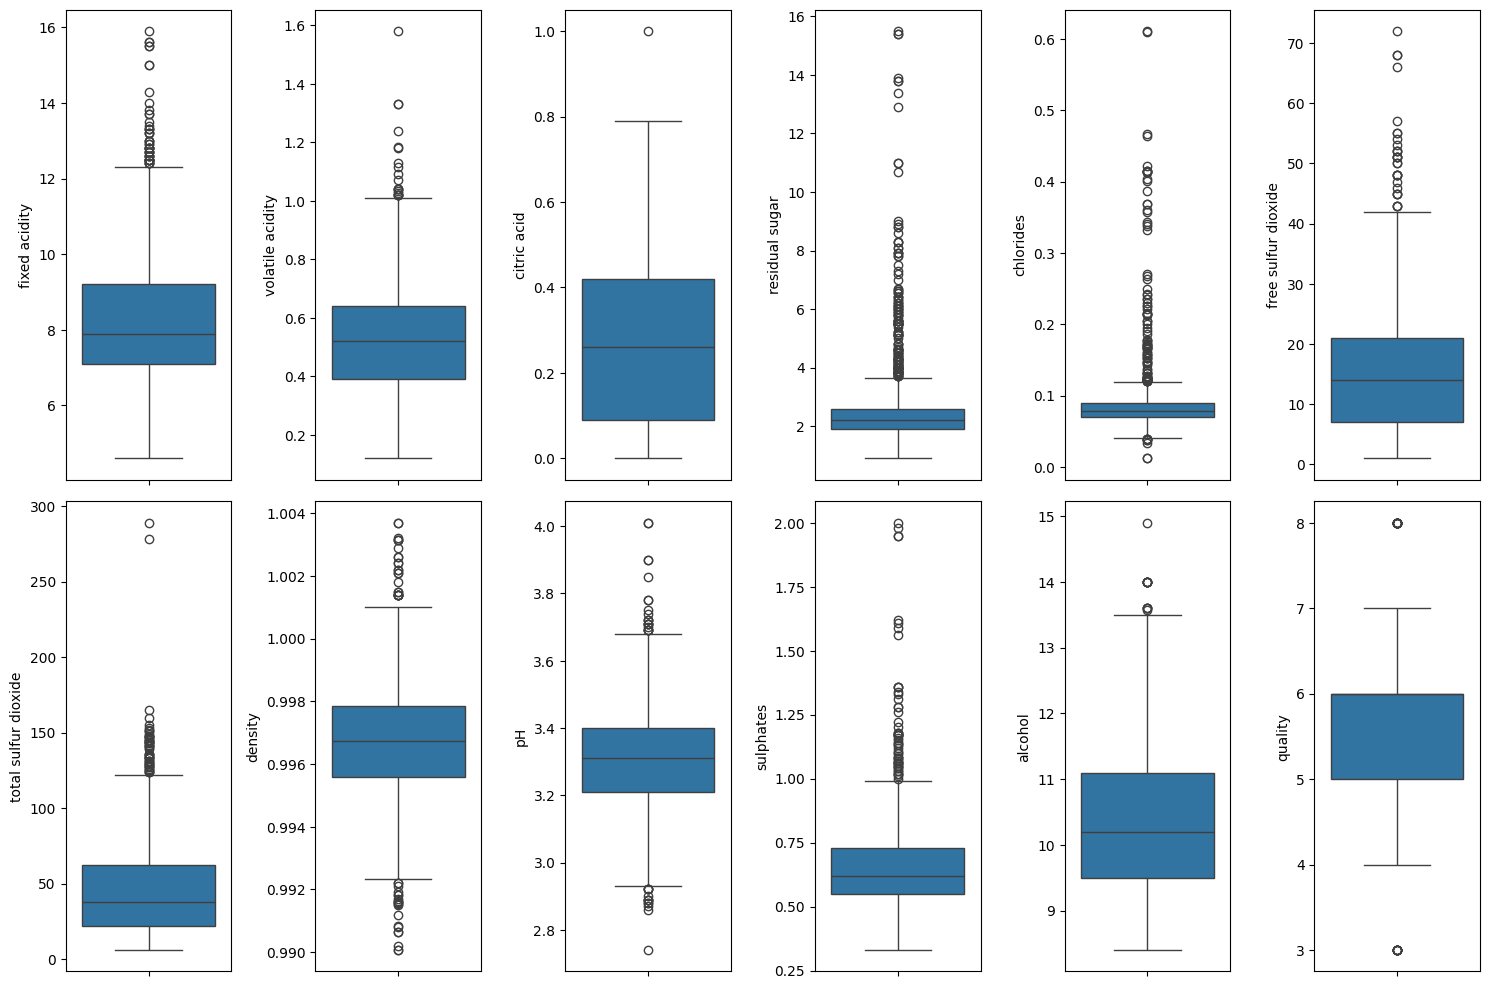

In [12]:

fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 10), facecolor='white')
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=df[col], ax=ax[index])
    index += 1

plt.tight_layout()


The boxplot above provides a clear depiction of whisker details and outliers. While continuous outlier sections are currently being disregarded, single-value outliers that significantly deviate from the boxplot's whiskers may require treatment based on subsequent analyses. At this stage, the primary focus is on retaining as much data as possible within the given dataset.


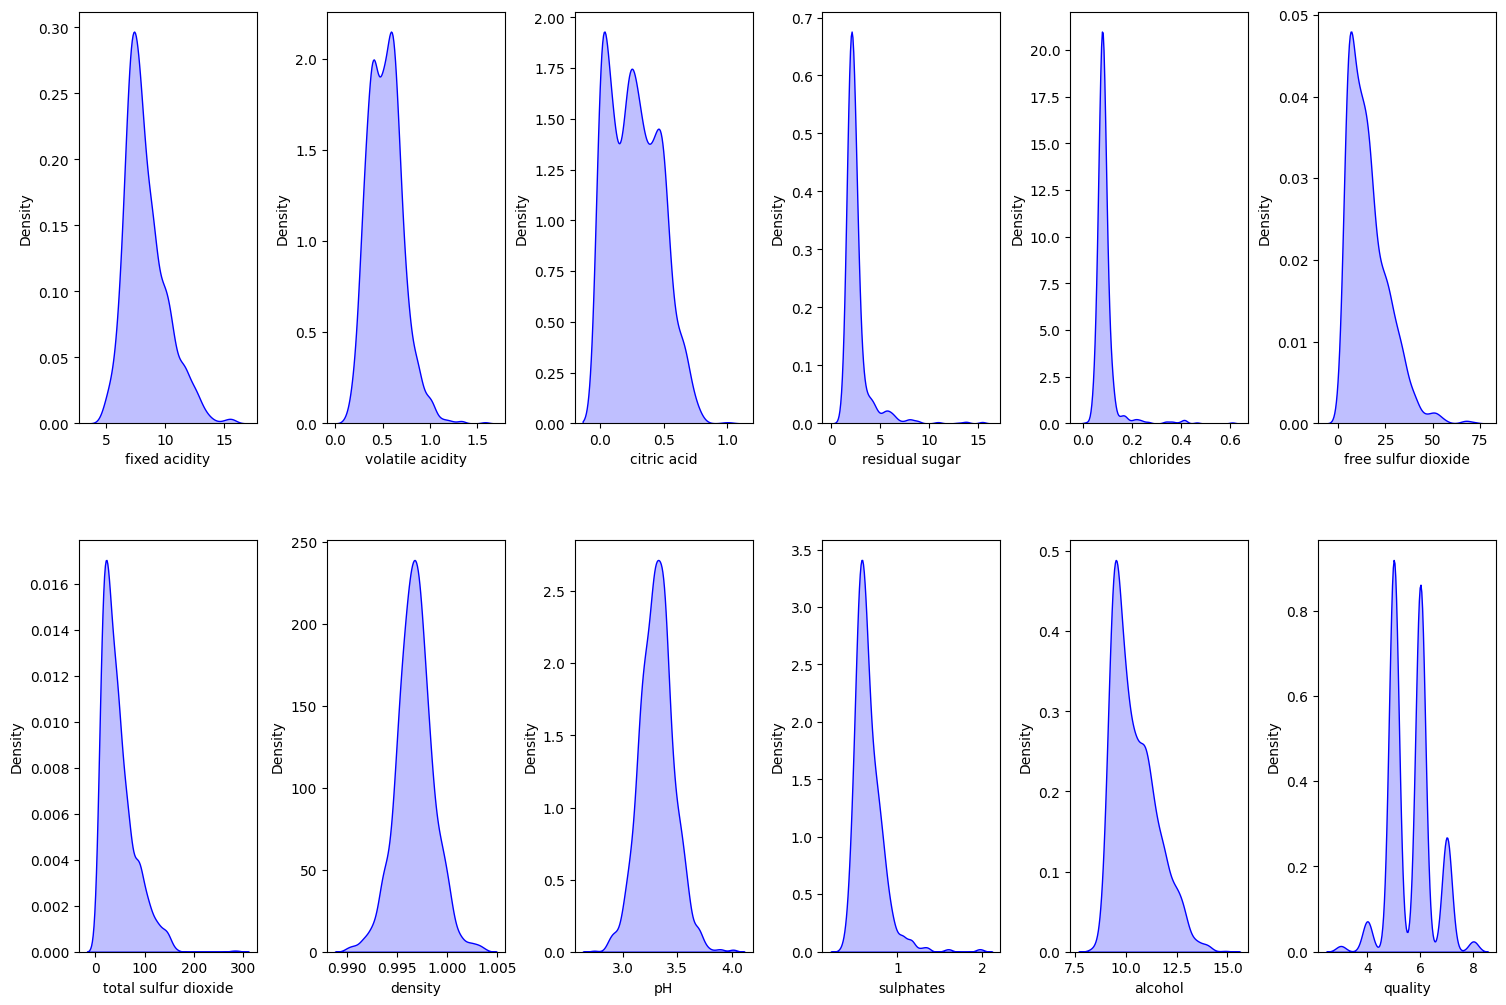

In [13]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

The distribution plots reveal that some columns follow a normal distribution with a characteristic bell-shaped curve. However, a majority of the feature columns, such as citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, and alcohol, exhibit skewness. It's important to note that the label column, being categorical, will require addressing data imbalance.

Regarding the handling of skewness and outliers, decisions on removal or treatment will be made based on the observed accuracy dependencies of the machine learning models.


## Correlation using a Heatmap

<Axes: >

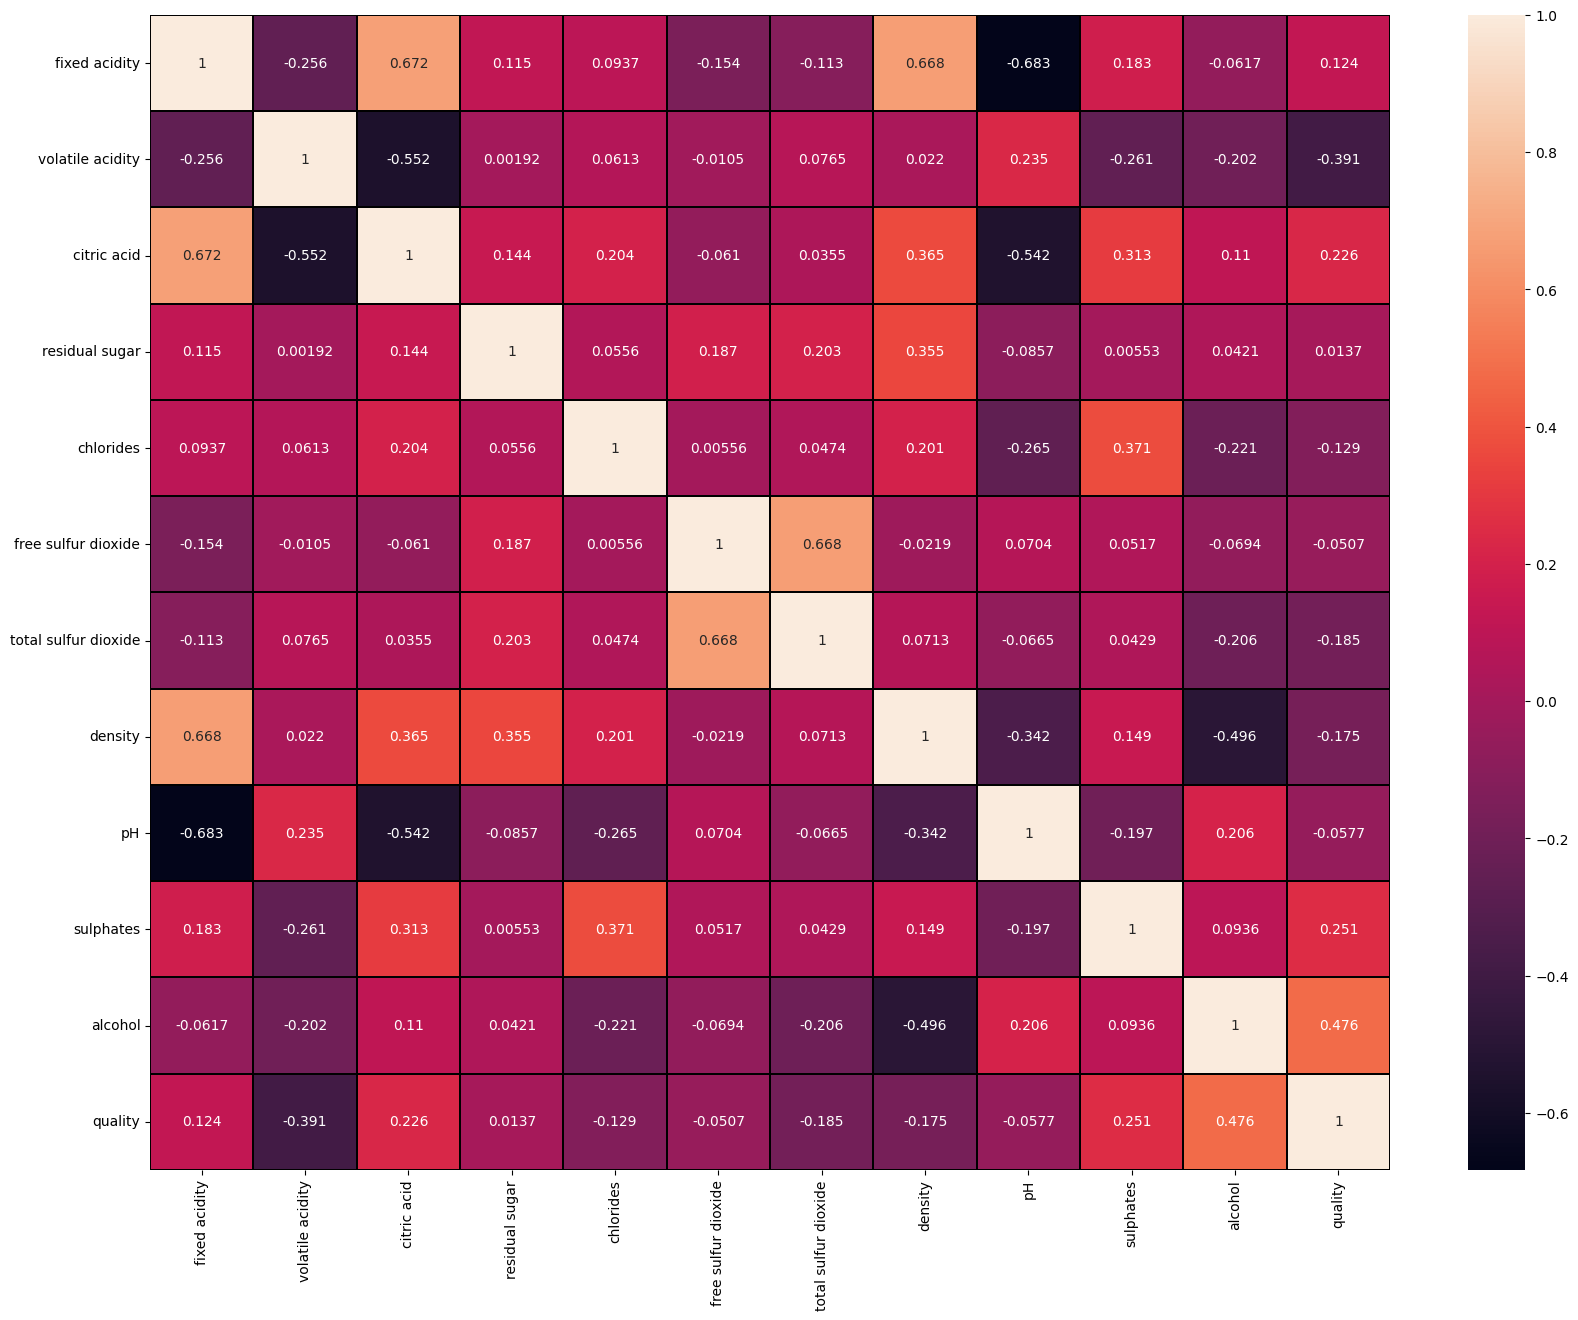

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".3g",linecolor="black",annot=True)

I see that the above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation I see that quality column is positively correlated with alcohol and it is negatively correlated with the volatile acidity. The quality column is least correlated with residual sugar showing a coefficient value of 0.014 that close to 0. Similarly we can bifurcate all the other positively and negatively correlated feature columns with respect to the target label.

Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable 'r', is exactly +1 or -1, then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.

Right now I see columns fixed acidity and citirc acid are positively correlated with a value of 0.672 which is close to 1. Similary, columns fixed acidity and density are positively correlated with a value of 0.668 again being close to 1. The other 2 column that's positively correlated are free sulfur dioxide and total sulfur dioxide with a value of 0.668 which is close to the value 1. The only negatively correlated columns that pop up are fixed acitidy and pH with a value -0.683 being close to the value -1.

We may need to deal with multicollinearity later if required to improve the accuracy of our machine learning models.

### Dropping a column

In [15]:
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


I sense that both "free sulfur dioxide" and "total sulfur dioxide" are pointing towards the same sulfur dioxide feature. Hence, I am opting to exclude the "free" option and retain only the "total" sulfur dioxide in our dataset.

## Outlier removal

In [16]:
df.shape

(1599, 11)

Verifying the count of columns and rows before eliminating outliers from the dataset.

In [17]:
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
np.where (z>3)
df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


I have used the Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-0.5 value of skewness.

In [18]:
df.shape

(1464, 11)

Verifying the count of rows in the dataset post the application of the outlier removal technique.


In [19]:
# Percentage of Data Loss

data_loss=(1599-1464)/1599*100 
# 1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
data_loss

8.442776735459661

Following the removal of outliers, we are assessing the data loss percentage by comparing the rows between our original dataset and the new dataset post-outlier removal.


### Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label


In [20]:
X = df.drop('quality', axis=1)
Y = df['quality']

I have split the dataset into features and labels, where X denotes all the feature columns and Y represents the target label column.


### Taking care of class imbalance

In [21]:
Y.value_counts()

quality
5    624
6    590
7    187
4     47
8     16
Name: count, dtype: int64

In [22]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
X, Y=SM.fit_resample(X,Y)

We are employing SMOTE as our oversampling technique to ensure equal representation of all categories within our target label.

In [23]:
Y.value_counts()

quality
5    624
6    624
7    624
4    624
8    624
Name: count, dtype: int64

Following the application of oversampling, we are once again enumerating the values of our label column to validate the updated information. Notably, the class imbalance issue has been effectively addressed, ensuring uniform data representation across all categories. This mitigates the risk of bias in the machine learning model towards any specific category.

In [24]:
Y 

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

### Label Binarization

In [25]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) 
Y 

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

By employing the label binarization technique, we have assigned two major classes to the categories within our target label. Specifically, 0 represents bad quality wine, while 1 signifies good quality wine.

In [26]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,8.904649,0.402079,0.400752,2.624345,0.068896,12.179206,0.995597,3.328495,0.713297,11.861285
3116,10.526771,0.355413,0.526752,2.513385,0.070108,16.000000,0.996921,3.156496,0.654331,11.162402
3117,7.960043,0.349489,0.463322,3.582115,0.077923,36.897799,0.997318,3.343996,0.859489,12.761675
3118,9.951673,0.400779,0.479221,2.573274,0.071604,16.267260,0.995904,3.163363,0.668708,11.561246


### FEATURES scalling using standard scalarization


In [27]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.674504,1.036466,-1.526764,-0.637565,-0.152044,-0.100256,0.836381,1.487966,-0.795325,-1.250658
1,-0.423800,2.038626,-1.526764,0.139353,1.077148,1.165149,0.219868,-0.748180,0.110990,-0.888979
2,-0.423800,1.370519,-1.321188,-0.193612,0.741914,0.666656,0.343171,-0.315378,-0.115589,-0.888979
3,1.707184,-1.301908,1.351291,-0.637565,-0.207916,0.896730,0.959683,-1.036715,-0.644272,-0.888979
4,-0.674504,1.036466,-1.526764,-0.637565,-0.152044,-0.100256,0.836381,1.487966,-0.795325,-1.250658
...,...,...,...,...,...,...,...,...,...,...
3115,0.268550,-0.622223,0.532856,0.166373,-0.548960,-0.936988,-0.521635,0.178705,0.362468,0.974829
3116,1.285231,-0.882039,1.180416,0.043221,-0.481229,-0.790477,0.294261,-1.061990,-0.082880,0.342901
3117,-0.323491,-0.915024,0.854423,1.229385,-0.044582,0.010862,0.539151,0.290515,1.466603,1.788958
3118,0.924782,-0.629462,0.936135,0.109690,-0.397683,-0.780229,-0.332656,-1.012457,0.025707,0.703534


Despite all feature columns initially being of float data type, I found discrepancies in decimal places that raised concerns about potential bias in my model. Consequently, I have opted to utilize the Standard Scaler method to standardize all feature columns, ensuring uniformity in their scale.


## creating train test split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

I am allocating 20 percent of the entire dataset for training purposes, reserving the remaining 80 percent for the training of machine learning models.

###  Model for Classification and Evaluation Metrics

In [29]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have created a class that handles the train-test split, machine learning model training, label value prediction, accuracy score computation, classification report generation, cross-validation score retrieval, and calculates the difference between the accuracy score and cross-validation score for any machine learning model utilizing this function.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [31]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 89.74358974358975

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       391
           1       0.85      0.88      0.86       233

    accuracy                           0.90       624
   macro avg       0.89      0.89      0.89       624
weighted avg       0.90      0.90      0.90       624

Cross Validation Score: 87.69230769230771

Accuracy Score - Cross Validation Score is 2.051282051282044


Developed a Logistic Regression model and assessed its performance using evaluation metrics.


In [61]:
#checking the accuracy for SVC(SUPPORT VECTOR MACHINE CLLASSIFIER)(CHECK YOURSELF)(3:30)
svc=  SVC()
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))


0.9150641025641025
[[362  29]
 [ 24 209]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       391
           1       0.88      0.90      0.89       233

    accuracy                           0.92       624
   macro avg       0.91      0.91      0.91       624
weighted avg       0.92      0.92      0.92       624



In [32]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 91.50641025641025

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       391
           1       0.88      0.90      0.89       233

    accuracy                           0.92       624
   macro avg       0.91      0.91      0.91       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 89.80769230769229

Accuracy Score - Cross Validation Score is 1.698717948717956


Developed a Support Vector Classifier (SVC) model and evaluated its performance using relevant metrics.

In [33]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 95.51282051282051

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       391
           1       0.93      0.96      0.94       233

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.95       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 92.78846153846153

Accuracy Score - Cross Validation Score is 2.724358974358978


Developed a Random Forest Classifier model and assessed its performance through evaluation metrics.


In [34]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 90.5448717948718

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       391
           1       0.85      0.91      0.88       233

    accuracy                           0.91       624
   macro avg       0.90      0.91      0.90       624
weighted avg       0.91      0.91      0.91       624

Cross Validation Score: 88.58974358974359

Accuracy Score - Cross Validation Score is 1.9551282051282044


Developed a K Neighbors Classifier model and evaluated its performance using appropriate metrics.


In [35]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 96.63461538461539

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       391
           1       0.95      0.96      0.96       233

    accuracy                           0.97       624
   macro avg       0.96      0.97      0.96       624
weighted avg       0.97      0.97      0.97       624

Cross Validation Score: 93.36538461538461

Accuracy Score - Cross Validation Score is 3.2692307692307736


Developed an Extra Trees Classifier model and assessed its performance using evaluation metrics.


In [36]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 95.3525641025641

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       391
           1       0.93      0.94      0.94       233

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 92.24358974358975

Accuracy Score - Cross Validation Score is 3.1089743589743506


Developed an XGBoost Classifier model and assessed its performance through evaluation metrics.


## Hyper parameter tuning on the best ML Model

In [37]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

Following a comprehensive comparison of all classification models, I have chosen the Support Vector Classifier as the most effective. The parameters for the selected model are documented above, referencing the information provided on the sklearn webpage.

In [38]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

I am employing the Grid Search CV method to perform hyperparameter tuning for my chosen optimal model.


In [39]:
GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

I have trained the Grid Search CV using a predefined list of parameters to explore and identify the best possible outcomes.

In [40]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

The Grid Search CV has furnished me with the optimal parameter list from the various combinations it explored during the model training process.

In [41]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 91.50641025641025


I have effectively applied Hyperparameter Tuning to my final model and obtained the corresponding accuracy score.


## AUC ROC Curve

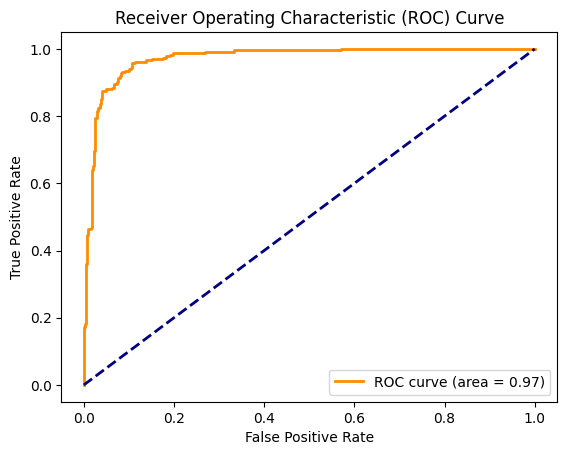

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming Final_Model.predict_proba() returns the predicted probabilities
y_scores = Final_Model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


I have created the ROC Curve for my ultimate model, revealing an impressive AUC score of 97%.

## Confusion Matrix

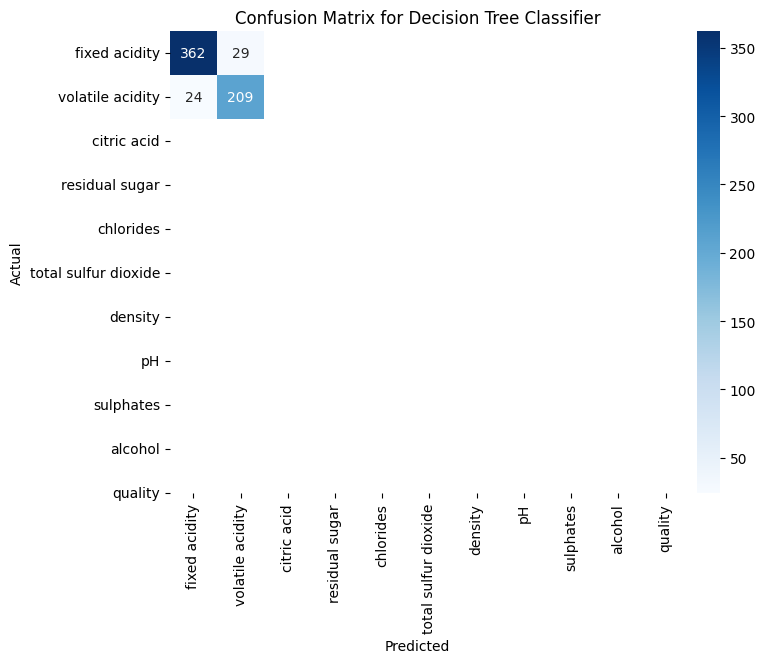

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Classifier.predict() returns the predicted labels
y_pred = Classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The confusion matrix above aids in comprehending the instances where my model correctly predicted outputs (illustrated in the black boxes) and instances where it failed to provide accurate predictions.

## Saving the model


In [54]:
filename = "FinalModel_3.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_3.pkl']

Now here,I am saving my best classification model using the joblib library.

In [66]:
model=joblib.load("FinalModel_3.pkl")
##prediction
prediction=model.predict(X_test)
prediction

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,